Rajendra Singh (111601017)

To view below notebook in colab click here
https://colab.research.google.com/drive/1TgvPenA31L4csOXMeMMNIVTm2yL5U8jr

# ================================ Imports ========================


In [0]:
from __future__ import print_function
# from tensorflow.keras.datasets import cifar10
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras import layers
# from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
# from tensorflow.keras.layers import Conv2D, MaxPooling2D

import keras
from keras.datasets import cifar10

from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, LeakyReLU, Activation
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K

from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from time import *

import os

In [7]:
batch_size = 256
num_classes = 10
epochs = 20
num_predictions = 20
lr=1e-4
save_dir = os.path.join(os.getcwd(), 'saved_models')
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
template = 'keras_cifar10_trained_model{}.h5'
model_names = [template.format(x) for x in range(1, 10)]
print(model_names)

# list of param to store result of various models
TotalNoPara=[0]*10
TrainingTime=[0]*10
TrainingAccuracy = [0]*10
ValidationAccuracy = [0]*10
TestAccuracy = [0]*10

['keras_cifar10_trained_model1.h5', 'keras_cifar10_trained_model2.h5', 'keras_cifar10_trained_model3.h5', 'keras_cifar10_trained_model4.h5', 'keras_cifar10_trained_model5.h5', 'keras_cifar10_trained_model6.h5', 'keras_cifar10_trained_model7.h5', 'keras_cifar10_trained_model8.h5', 'keras_cifar10_trained_model9.h5']


# ========================== Data Processing ======================


In [8]:
# ------------ load ------------
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# ------------ one hot encoding ------------
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# ------------ normalise ------------
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# ------------ split ------------
x_val = x_train[:10000]
y_val = y_train[:10000]
x_train = x_train[10000:]
y_train = y_train[10000:]

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [0]:
# ======================== Funtion to create model ==========================
def createModel(s1,s2,f1,f2,p1,p2, flag=0, Strides=1, Padding='valid', Activation='relu'): #here h is no. of hidden layer and size of it, acti is activation function
  print("\n----------------- ", "Function Parameters", " ------------------------------\n")
  print(' s1:',s1, '\n s2:',s2, '\n f1:',f1, '\n f2:',f2, '\n p1:',p1, '\n p2:',p2, '\n flag:',flag, '\n Strides:',Strides, '\n Padding:',Padding, '\n Activation:',Activation)
  model = Sequential()
  model.add(Conv2D(s1, (f1, f1), input_shape=x_train.shape[1:], activation=Activation,padding=Padding,strides=Strides))
  model.add(MaxPooling2D(pool_size=(p1, p1)))
  
  model.add(Conv2D(s2, (f2, f2), activation=Activation,padding=Padding,strides=Strides))
  model.add(MaxPooling2D(pool_size=(p2, p2)))
  
  if flag==1:
    s3=128
    f3=3
    p3=2
    model.add(Conv2D(s3, (f3, f3), activation=Activation,padding=Padding,strides=Strides))
    model.add(MaxPooling2D(pool_size=(p3, p3)))

  model.add(Flatten())
  model.add(Dense(64, activation=Activation))
  model.add(Dense(num_classes, activation='softmax'))
  print("\n----------------- ", "Model Summury", " ------------------------------\n")
  print(model.summary())
  return model


# ===================== Funtion to train model ================
def trainModel(i,model,lr):
  print("\n----------------- ", "Training Starts", " ------------------------------\n")
  model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(lr=lr), metrics=['accuracy'])
  es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=5) #early stop if validation loss increases 
  mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
  tempt = time()
  history =  model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_val, y_val), callbacks=[es, mc])
  
  tempt = time() - tempt
  TrainingTime[i]=tempt
  print("\n----------------- ", "Training Ends", " ------------------------------\n")
  print("\n----------------------- Time ---------------------------\n")
  print("\nTraining time(sec): ", tempt,"\n")

  print("\n----------------------- Plots ---------------------------\n")
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  
  model = load_model('best_model.h5')
  
  return model, tempt

# ===================== Funtion to evaluate model ================
def evalModel(i,model):
  score = model.evaluate(x_test, y_test, verbose=0) #evaluating on test set
  print("\n------------------------- Evaluation --------------------------\n")
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  TestAccuracy[i] = score[1]
  TrainingAccuracy[i] = model.evaluate(x_train, y_train, verbose=0)[1]
  ValidationAccuracy[i] = model.evaluate(x_val, y_val, verbose=0)[1]
  TotalNoPara[i] = model.count_params()
  return score[0], score[1]

# ===================== Funtion to print model ================
def printModel(model):
  print(" Model summury ")
  model.summary()
  print("\n------------------------------------------------------------\n")

# ============================= Model 1 ========================



-----------------  Function Parameters  ------------------------------

 s1: 32 
 s2: 64 
 f1: 5 
 f2: 5 
 p1: 2 
 p2: 2 
 flag: 0 
 Strides: 1 
 Padding: valid 
 Activation: relu

-----------------  Model Summury  ------------------------------

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
____

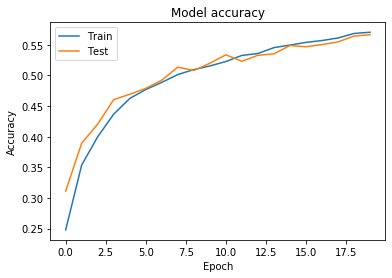

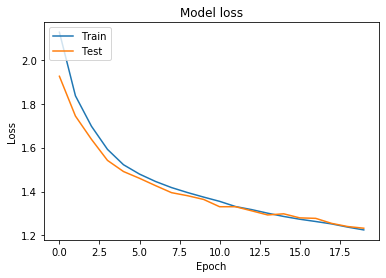


------------------------- Evaluation --------------------------

Test loss: 1.2466151807785035
Test accuracy: 0.5582


In [10]:
lr=1e-4
#================== Create model ================
model =  createModel(32,64,5,5,2,2) #rest other parameter are default(see function defination to see what default)
#================== Train model ================
model,_ = trainModel(1,model,lr)
#================== eval model ================
loss_ci, acc_ci = evalModel(1,model)

# ============================= Model 2 ========================
Input → conv1 (32 filters (5x5)) → Maxpool (3x3) → conv2 (64 filters (5x5)) → Maxpool
(3x3) → Flatten → FCL1(64) → Softmax output layer(10)


-----------------  Function Parameters  ------------------------------

 s1: 32 
 s2: 64 
 f1: 5 
 f2: 5 
 p1: 3 
 p2: 3 
 flag: 0 
 Strides: 1 
 Padding: valid 
 Activation: relu

-----------------  Model Summury  ------------------------------

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 64)          51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
____

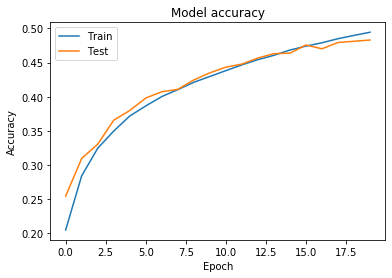

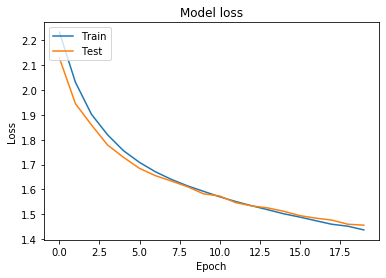


------------------------- Evaluation --------------------------

Test loss: 1.4659878833770752
Test accuracy: 0.4799


In [11]:
# epochs=2
#================== Create model ================
model =  createModel(32,64,5,5,3,3)
#================== Train model ================
model,_ = trainModel(2,model,lr)
#================== eval model ================
loss_ci, acc_ci = evalModel(2,model)

# ============================= Model 3 ========================
Input → conv1 (32 filters (3x3)) → Maxpool (2x2) → conv2 (64 filters (3x3)) → Maxpool
(2x2) → Flatten → FCL1(64) → Softmax output layer(10)



-----------------  Function Parameters  ------------------------------

 s1: 32 
 s2: 64 
 f1: 3 
 f2: 3 
 p1: 2 
 p2: 2 
 flag: 0 
 Strides: 1 
 Padding: valid 
 Activation: relu

-----------------  Model Summury  ------------------------------

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
____

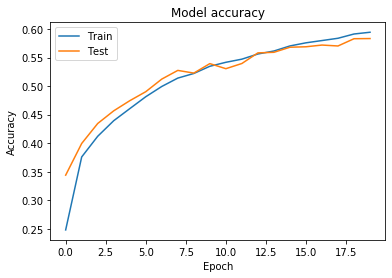

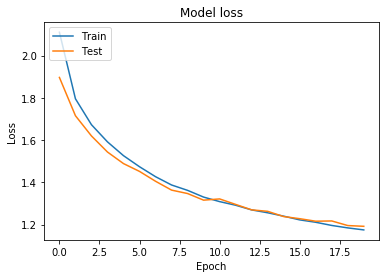


------------------------- Evaluation --------------------------

Test loss: 1.2012041864395142
Test accuracy: 0.5799


In [12]:
#================== Create model ================
model =  createModel(32,64,3,3,2,2)
#================== Train model ================
model,_ = trainModel(3,model,lr)
#================== eval model ================
loss_ci, acc_ci = evalModel(3,model)

# ============================= Model 4 ========================
Input → conv1 (32 filters (3x3)) → Maxpool (2x2) → conv2 (64 filters (3x3)) → Maxpool
(2x2) → conv3 (128 filters (3x3)) → Maxpool (2x2) → Flatten → FCL1(64) → Softmax
output layer(10)


-----------------  Function Parameters  ------------------------------

 s1: 32 
 s2: 64 
 f1: 3 
 f2: 3 
 p1: 2 
 p2: 2 
 flag: 1 
 Strides: 1 
 Padding: valid 
 Activation: relu

-----------------  Model Summury  ------------------------------

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 128)         73856     
____

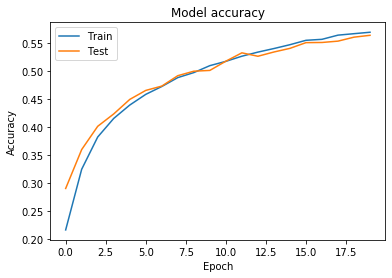

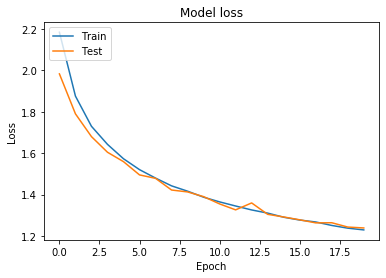


------------------------- Evaluation --------------------------

Test loss: 1.2584207153320313
Test accuracy: 0.5544


In [13]:
#================== Create model ================
model =  createModel(32,64,3,3,2,2,1) #here flag=1, which uses optional argument s3=128,f3=3,p3=2
#================== Train model ================
model,_ = trainModel(4,model,lr)
#================== eval model ================
loss_ci, acc_ci = evalModel(4,model)

# ============================= Model 5 ========================
best model found so far is model3 because is have the lowest test accuracy

Stride=2


-----------------  Function Parameters  ------------------------------

 s1: 32 
 s2: 64 
 f1: 3 
 f2: 3 
 p1: 2 
 p2: 2 
 flag: 0 
 Strides: 2 
 Padding: valid 
 Activation: relu

-----------------  Model Summury  ------------------------------

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 15, 15, 32)        896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 64)          18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)                0         
____

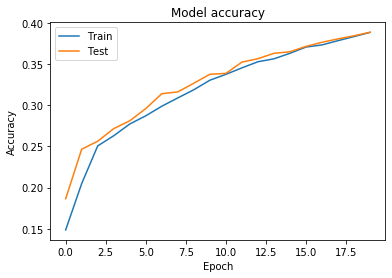

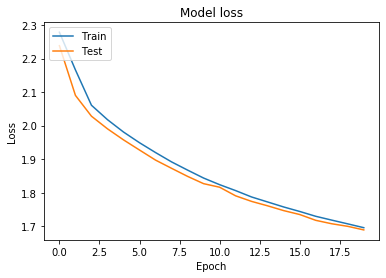


------------------------- Evaluation --------------------------

Test loss: 1.6961816492080688
Test accuracy: 0.3911


In [16]:
# epochs=2
#================== Create model ================
model =  createModel(32,64,3,3,2,2,0,2) #createModel(s1,s2,f1,f2,p1,p2, flag=0, Strides=1, Padding='valid', Activation='relu')
#================== Train model ================
model,_ = trainModel(5,model,lr)
#================== eval model ================
loss_ci, acc_ci = evalModel(5,model)

# ============================= Model 6 ========================
Padding=same, stride=1


-----------------  Function Parameters  ------------------------------

 s1: 32 
 s2: 64 
 f1: 3 
 f2: 3 
 p1: 2 
 p2: 2 
 flag: 0 
 Strides: 1 
 Padding: same 
 Activation: relu

-----------------  Model Summury  ------------------------------

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 4096)              0         
_____

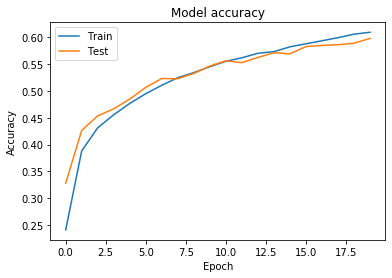

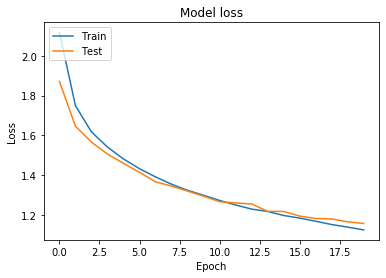


------------------------- Evaluation --------------------------

Test loss: 1.1486642883300782
Test accuracy: 0.5986


In [17]:
#================== Create model ================
model =  createModel(32,64,3,3,2,2,0,1,'same') #createModel(s1,s2,f1,f2,p1,p2, flag=0, Strides=1, Padding='valid', Activation='relu')
#================== Train model ================
model,_ = trainModel(6,model,lr)
#================== eval model ================
loss_ci, acc_ci = evalModel(6,model)

# ============================= Model 7 ========================
Padding=same, stride=2


-----------------  Function Parameters  ------------------------------

 s1: 32 
 s2: 64 
 f1: 3 
 f2: 3 
 p1: 2 
 p2: 2 
 flag: 0 
 Strides: 2 
 Padding: same 
 Activation: relu

-----------------  Model Summury  ------------------------------

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 16, 16, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 4, 4, 64)          18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 256)               0         
____

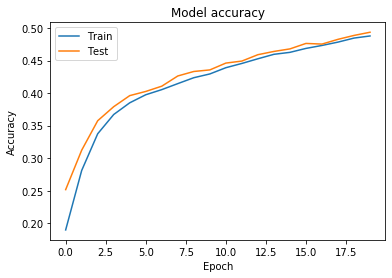

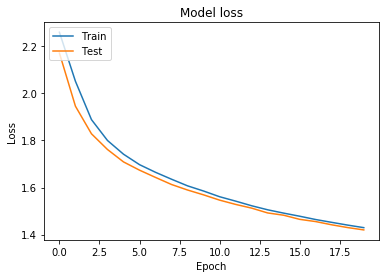


------------------------- Evaluation --------------------------

Test loss: 1.42836143989563
Test accuracy: 0.49


In [18]:
#================== Create model ================
model =  createModel(32,64,3,3,2,2,0,2,'same') #createModel(s1,s2,f1,f2,p1,p2, flag=0, Strides=1, Padding='valid', Activation='relu')
#================== Train model ================
model,_ = trainModel(7,model,lr)
#================== eval model ================
loss_ci, acc_ci = evalModel(7,model)

# ============================= Model 8 ========================

Q. Which model best 1-7?
=> Model 6 is best as it maximum test accuracy and minimum loss    among all other model.

Q. Why this model is best?
=> Since this model have stride 1 (not 2) this make the convolution opteration more dense and also with "same" padding enable it to mantain the shape same as input and efficient convolution operation at the egdes.

Continuing with best model (model6) with tanh in hidden layer


-----------------  Function Parameters  ------------------------------

 s1: 32 
 s2: 64 
 f1: 3 
 f2: 3 
 p1: 2 
 p2: 2 
 flag: 0 
 Strides: 1 
 Padding: same 
 Activation: tanh

-----------------  Model Summury  ------------------------------

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 4096)              0         
____

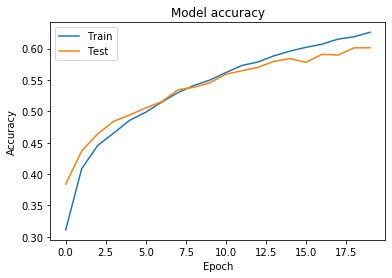

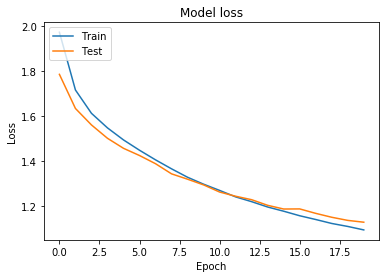


------------------------- Evaluation --------------------------

Test loss: 1.1393866677284241
Test accuracy: 0.6035


In [19]:
  #================== Create model ================
model =  createModel(32,64,3,3,2,2,0,1,'same', Activation='tanh') #createModel(s1,s2,f1,f2,p1,p2, flag=0, Strides=1, Padding='valid', Activation='relu')
#================== Train model ================
model,_ = trainModel(8,model,lr)
#================== eval model ================
loss_ci, acc_ci = evalModel(8,model)

# ============================= Model 8 ========================
Continuing with best model(model6) with sigmoid in hidden layer


-----------------  Function Parameters  ------------------------------

 s1: 32 
 s2: 64 
 f1: 3 
 f2: 3 
 p1: 2 
 p2: 2 
 flag: 0 
 Strides: 1 
 Padding: same 
 Activation: sigmoid

-----------------  Model Summury  ------------------------------

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 4096)              0         
_

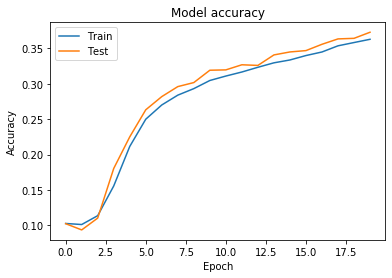

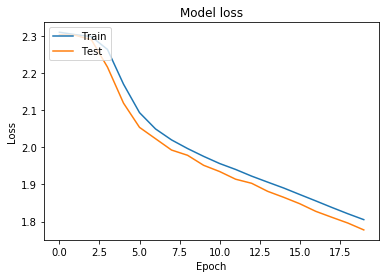


------------------------- Evaluation --------------------------

Test loss: 1.7875038791656495
Test accuracy: 0.371


In [20]:
  #================== Create model ================
model =  createModel(32,64,3,3,2,2,0,1,'same', Activation='sigmoid') #createModel(s1,s2,f1,f2,p1,p2, flag=0, Strides=1, Padding='valid', Activation='relu')
#================== Train model ================
model,_ = trainModel(8,model,lr)
#================== eval model ================
loss_ci, acc_ci = evalModel(8,model)

# ============================= Printing Table ====================

In [26]:
print('model',"\t",'TotalNoPara',"\t\t",'TrainingTime',"\t",'TrainingAccuracy',"\t",'ValidationAccuracy',"\t",'TestAccuracy')
for i in range(1,9):
  print(i,"\t","{0:.2f}".format(TotalNoPara[i]),"\t\t","{0:.2f}".format(TrainingTime[i]),"\t\t",TrainingAccuracy[i],"\t\t","{0:.2f}".format(ValidationAccuracy[i]),"\t\t",TestAccuracy[i])

model 	 TotalNoPara 		 TrainingTime 	 TrainingAccuracy 	 ValidationAccuracy 	 TestAccuracy
1 	 156810.00 		 1440.01 		 0.577775 		 0.57 		 0.5582
2 	 58506.00 		 731.16 		 0.491875 		 0.48 		 0.4799
3 	 167562.00 		 934.34 		 0.59795 		 0.58 		 0.5799
4 	 126730.00 		 1064.82 		 0.5776 		 0.56 		 0.5544
5 	 24202.00 		 174.98 		 0.389725 		 0.39 		 0.3911
6 	 282250.00 		 1277.98 		 0.61515 		 0.60 		 0.5986
7 	 36490.00 		 228.35 		 0.49295 		 0.49 		 0.49
8 	 282250.00 		 1269.36 		 0.3676 		 0.37 		 0.371
